### Import Dependencies

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import csv
import openpyxl

In [2]:
# Save figure into file, then display
def save_show_plot(filepath):
    filepath = f"{filepath}.png"
    
    file_exists = False        
    if os.path.isfile(filepath):
         file_exists = True 

    plt.savefig(filepath)
    if file_exists:
        print(f"*** Figure replaced in: {filepath} ************************")
    else:
        print(f"*** Figure created in: {filepath} ************************")

    # Show plot
    plt.show()    
    plt.close()

### Retrieve CSV data files

In [3]:
#CSV file paths
accident_path = "project_data/accident_df.csv"
accident_event_path = "project_data/accident_event_df.csv"
person_path = "project_data/person_df.csv"
subdca_path = "project_data/subdca_path_df.csv"

# reading the CSV files, increase memory capacity
accident_df = pd.read_csv(accident_path, low_memory = False)
accident_event_df = pd.read_csv(accident_event_path, low_memory = False)
person_df = pd.read_csv(person_path, low_memory = False)
subdca_df = pd.read_csv(subdca_path, low_memory = False)

## Define function

In [4]:
# Holding the original output object. i.e. console out
path = "c:/Project_output"
# Export weather data to a csv file
try:
    os.mkdir(path)
    print(f"*** Folder created: {path} ***")
except OSError as error:
    print(f"*** Folder already existed: {path} ***")    

# Holding the original output object. i.e. console out    
orig_stdout = sys.stdout

# Opening the file to write file deletion logs.
log_filename = 'ProjectLog.txt'
filepath = f"{path}/{log_filename}"  
log_file = open(filepath, 'a+')

print(f"*** Creating log file: {filepath} ...")

# Changing standard out to file out. 
sys.stdout = log_file

*** Folder already existed: c:/Project_output ***
*** Creating log file: c:/Project_output/ProjectLog.txt ...


### Extract interested accident data

In [5]:
df = accident_df.loc[:, ~accident_df.columns.str.contains('^Unnamed')]
df.reset_index(drop=True, inplace = True)
extract_acct_df = accident_df[['ACCIDENT_NO', 'ACCIDENTDATE', 'ACCIDENTTIME', 'ACCIDENT_TYPE', 'Accident Type Desc',
        'Light Condition Desc','SPEED_ZONE', 'NO_PERSONS', 'SEVERITY', 'SEVERITY_DESC']]
extract_acct_df.rename(columns={"Accident Type Desc":"ACCT_TYPE_DESC", 'Light Condition Desc': 'LIGHT_COND_DESC'}, inplace=True) 
row_counts = len(extract_acct_df["ACCIDENT_NO"].unique())
row_counts

c:\Users\youpe.DESKTOP-UVNLIE6\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


62266

## Accident Type analysis for each year

### Build accident type count lists base on year

In [227]:
# Convert ACCIDENTDATE to datetime format to get the year
extract_acct_df["ACCIDENTDATE"] = pd.to_datetime(extract_acct_df["ACCIDENTDATE"])
extract_acct_df["ACCIDENTYEAR"] = extract_acct_df["ACCIDENTDATE"].dt.year

# Get accident type data base on year
df = extract_acct_df.groupby(["ACCIDENTYEAR", "ACCIDENT_TYPE", "ACCT_TYPE_DESC"]).count()["ACCIDENT_NO"]
df = df.to_frame()
df.reset_index(inplace = True)
df.to_excel("project_data/Cause_AcctType.xlsx", index=False)

# Build accident type data lists
# 1 Collision with vehicle;  2 Struck pedestrian;  3 Struck animal; 4 Collision with a fixed object; 
# 5 Collision with some other object; 6 Vehicle overturned (no collision); 7 Fall from or in moving vehicle;
# 8 No collision and no object struck; 9 Other accident
coll_with_veh_counts = df.loc[df["ACCIDENT_TYPE"] == 1]
coll_with_veh_counts = coll_with_veh_counts["ACCIDENT_NO"]
struck_ped_counts = df.loc[df["ACCIDENT_TYPE"] == 2]
struck_ped_counts = struck_ped_counts["ACCIDENT_NO"]
struck_animal_counts = df.loc[df["ACCIDENT_TYPE"] == 3]
struck_animal_counts = struck_animal_counts["ACCIDENT_NO"]
coll_with_fixed_obj_counts = df.loc[df["ACCIDENT_TYPE"] == 4]
coll_with_fixed_obj_counts = coll_with_fixed_obj_counts["ACCIDENT_NO"]
coll_with_other_obj_counts = df.loc[df["ACCIDENT_TYPE"] == 5]
coll_with_other_obj_counts = coll_with_other_obj_counts["ACCIDENT_NO"]
veh_overturn_counts = df.loc[df["ACCIDENT_TYPE"] == 6]
veh_overturn_counts = veh_overturn_counts["ACCIDENT_NO"]
fall_moving_veh_counts = df.loc[df["ACCIDENT_TYPE"] == 7]
fall_moving_veh_counts = fall_moving_veh_counts["ACCIDENT_NO"]
no_coll_counts = df.loc[df["ACCIDENT_TYPE"] == 8]
no_coll_counts = no_coll_counts["ACCIDENT_NO"]
other_acct_counts = df.loc[df["ACCIDENT_TYPE"] == 9]
other_acct_counts = other_acct_counts["ACCIDENT_NO"]

C:\Users\YOUPE~1.DES\AppData\Local\Temp/ipykernel_7576/3431865699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extract_acct_df["ACCIDENTDATE"] = pd.to_datetime(extract_acct_df["ACCIDENTDATE"])
C:\Users\YOUPE~1.DES\AppData\Local\Temp/ipykernel_7576/3431865699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extract_acct_df["ACCIDENTYEAR"] = extract_acct_df["ACCIDENTDATE"].dt.year


### Setup bars, labels, etc to plot the bar chart

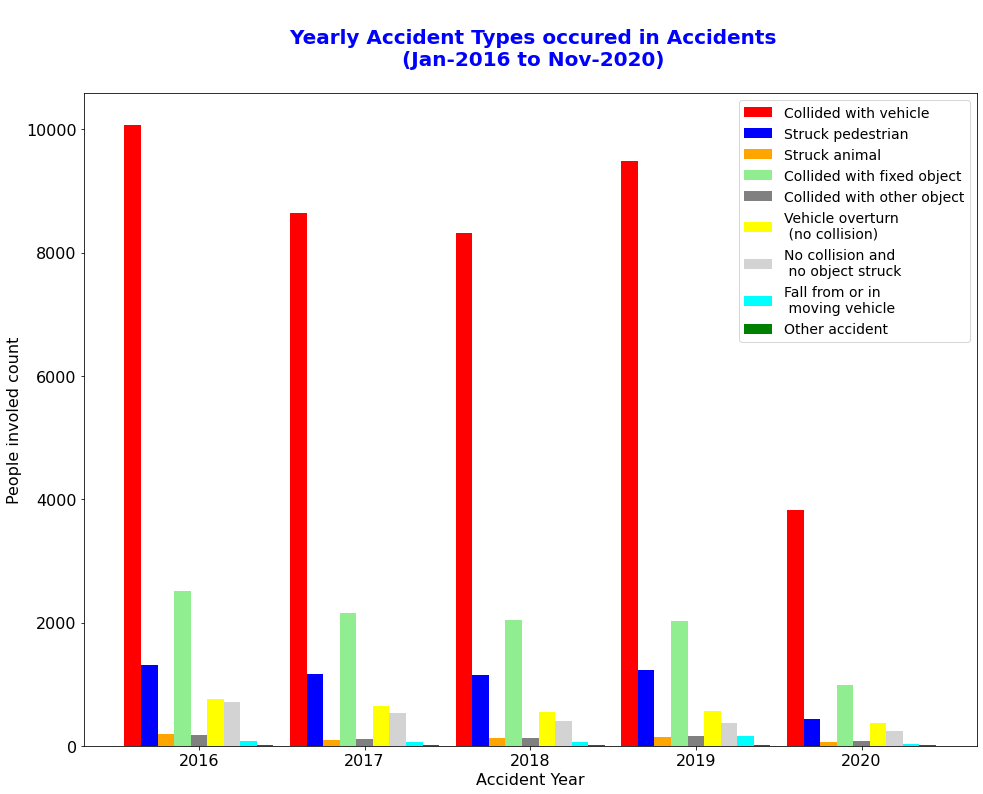

In [228]:
bar_width = 0.1 
xlabels = ['2016', '2017', '2018', '2019', '2020']

# Define bar group location on x_axis
bar1 = np.arange(len(xlabels))
bar2 = [i+bar_width for i in bar1]
bar3 = [i+bar_width for i in bar2]
bar4 = [i+bar_width for i in bar3]
bar5 = [i+bar_width for i in bar4]
bar6 = [i+bar_width for i in bar5]
bar7 = [i+bar_width for i in bar6]
bar8 = [i+bar_width for i in bar7]
bar9 = [i+bar_width for i in bar8]

plt.rcParams["figure.figsize"] = (16,12)
plt.plot(kind="bar")
plt.bar(bar1, coll_with_veh_counts,bar_width, label='Collided with vehicle', color = 'red')
plt.bar(bar2, struck_ped_counts,bar_width, label='Struck pedestrian',  color = 'blue')
plt.bar(bar3, struck_animal_counts, bar_width, label='Struck animal', color ='orange')
plt.bar(bar4, coll_with_fixed_obj_counts,bar_width, label='Collided with fixed object', color ='lightgreen')
plt.bar(bar5, coll_with_other_obj_counts, bar_width, label='Collided with other object', color ='grey')
plt.bar(bar6, veh_overturn_counts,bar_width, label='Vehicle overturn \n (no collision)', color ='yellow')
plt.bar(bar7, no_coll_counts, bar_width, label='No collision and \n no object struck', color ='lightgrey')
plt.bar(bar8, fall_moving_veh_counts,bar_width, label='Fall from or in \n moving vehicle', color ='cyan')
plt.bar(bar9, other_acct_counts,bar_width, label='Other accident', color ='green')

plt.title("\n Yearly Accident Types occured in Accidents\n (Jan-2016 to Nov-2020)\n", fontsize=20, color='b', fontweight='bold')
plt.xlabel("Accident Year", fontsize = 16)
plt.ylabel("People involed count",fontsize = 16)

# Define each label location where it starts from the first bar plus 4 bar widths
plt.xticks(bar1 + 4 * bar_width, xlabels, fontsize = 16)
plt.yticks(fontsize = 16)

# Show plot
plt.legend(fontsize = 14)

file_name = "YearlyAccidentTypeBarChart"  
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)         

## Severity level analysis 

### Create sevirity lists base on year

In [229]:
# Get accident type data base on year
df = extract_acct_df.groupby(["ACCIDENTYEAR", "SEVERITY", "SEVERITY_DESC"]).count()["ACCIDENT_NO"]
df = df.to_frame()
df.reset_index(inplace = True)
df.to_excel("project_data/Cause_AcctSeverity.xlsx", index=False)

# Build severity data lists
# 1 Fatal accident 2 Serious injury accident 3 Other injury accident 4 Non injury accident
fatal_counts = df.loc[df["SEVERITY"] == 1]
fatal_counts = fatal_counts["ACCIDENT_NO"]
serious_inj_counts = df.loc[df["SEVERITY"] == 2]
serious_inj_counts = serious_inj_counts["ACCIDENT_NO"]
other_inj_counts = df.loc[df["SEVERITY"] == 3]
other_inj_counts = other_inj_counts["ACCIDENT_NO"]

### Setup bars, labels, etc to plot the bar chart

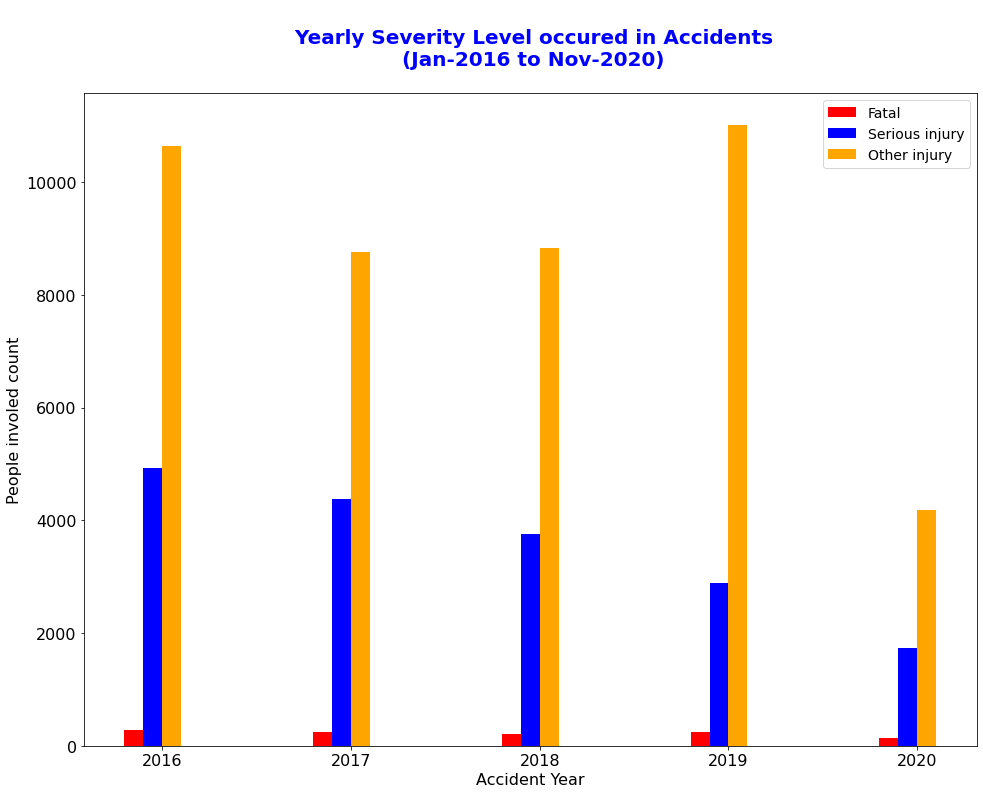

In [230]:
bar_width = 0.1 
xlabels = ['2016', '2017', '2018', '2019', '2020']

# Define bar group location on x_axis
bar1 = np.arange(len(xlabels))
bar2 = [i+bar_width for i in bar1]
bar3 = [i+bar_width for i in bar2]

plt.rcParams["figure.figsize"] = (16,12)
plt.plot(kind="bar")
plt.bar(bar1, fatal_counts,bar_width, label='Fatal', color = 'red')
plt.bar(bar2, serious_inj_counts,bar_width, label='Serious injury',  color = 'blue')
plt.bar(bar3, other_inj_counts, bar_width, label='Other injury', color ='orange')

plt.title("\n Yearly Severity Level occured in Accidents\n (Jan-2016 to Nov-2020)\n", fontsize=20, color='b', fontweight='bold')
plt.xlabel("Accident Year", fontsize = 16)
plt.ylabel("People involed count",fontsize = 16)

# Define each label location where it starts from the first bar plus one and a half bar widths
plt.xticks(bar1 + bar_width + bar_width/2, xlabels, fontsize = 16)
plt.yticks(fontsize = 16)

# Show plot
plt.legend(fontsize = 14)

file_name = "YearlySeverityBarChart"  
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)         

## Road user gender analysis

### Extract road user's details

In [258]:
df = person_df.drop(person_df.columns[0], axis=1)
extract_person_df = df[['ACCIDENT_NO', 'PERSON_ID', 'VEHICLE_ID', 'SEX', 'AGE',
        'Inj Level Desc', 'SEATING_POSITION','HELMET_BELT_WORN', 'Road User Type Desc',
        'PEDEST_MOVEMENT', 'TAKEN_HOSPITAL', 'EJECTED_CODE']]
extract_person_df.rename(columns = {'Inj Level Desc':"INJ_LEVEL_DESC", 'Road User Type Desc':"ROAD_USER_TYPE_DESC"}, inplace = True)
print(f"Person csv file rows: {len(extract_person_df)}")
row_counts = len(extract_person_df["ACCIDENT_NO"].unique())
row_counts

62266

In [259]:
# Find fatal injurty level
fatal_counts = extract_person_df.loc[extract_person_df["INJ_LEVEL_DESC"].isin(['Fatality'])]
df = fatal_counts.groupby(["SEX"]).count()["ACCIDENT_NO"]
df = df.to_frame()
df.reset_index(inplace = True)
# drop rows that have no sex defined
df = df.drop(0)
df.to_excel("project_data/Cause_FatalInGender.xlsx", index=False)

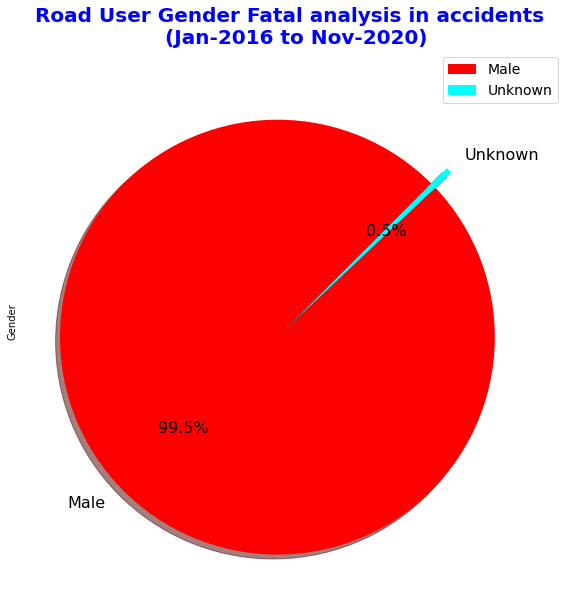

In [264]:
# Plot a pie chart of types involved
df.rename(columns = {'ACCIDENT_NO':"Gender"}, inplace = True)
user_counts = df["Gender"]

labels = ['Male', 'Unknown']
colors = [ "red", 'cyan']
explodes = (0.1, 0)

acct_chart = pd.DataFrame(data = user_counts)    

acct_chart.plot(kind = "pie", figsize = [15,10],
       subplots=True, shadow = True, 
       labels = labels, fontsize = 16, explode = explodes,
       startangle = 45, colors = colors,autopct="%1.1f%%" );
 
# Set title
plt.title("Road User Gender Fatal analysis in accidents \n (Jan-2016 to Nov-2020)", fontsize=20, color='b', fontweight='bold')

# Show plot
plt.legend(labels, loc="upper right", fontsize=14)
file_name = "RoadUserGenderPieChart"  
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)              

##  Road User Type analysis base on gender

In [255]:
# Find road users base base on gender
df = extract_person_df.groupby(["SEX", "ROAD_USER_TYPE_DESC"]).count()["ACCIDENT_NO"]
df = df.to_frame()
df.reset_index(inplace = True)

# drop rows that have no sex code defined
df = df.drop([0,1,2,3])
df.to_excel("project_data/Cause_RdUsrGender.xlsx", index=False)

In [256]:
# Build data lists
bicyclists = df.loc[df["ROAD_USER_TYPE_DESC"].isin(['Bicyclists'])]
bicyclists = bicyclists["ACCIDENT_NO"]
drivers = df.loc[df["ROAD_USER_TYPE_DESC"].isin(['Drivers'])]  
drivers = drivers["ACCIDENT_NO"]
motorcyclists = df.loc[df["ROAD_USER_TYPE_DESC"].isin(['Motorcyclists'])]  
motorcyclists = motorcyclists["ACCIDENT_NO"]
passengers = df.loc[df["ROAD_USER_TYPE_DESC"].isin(['Passengers'])]  
passengers = passengers["ACCIDENT_NO"]
pedestrians = df.loc[df["ROAD_USER_TYPE_DESC"].isin(['Pedestrians'])]  
pedestrians = pedestrians["ACCIDENT_NO"]
unknowns = df.loc[df["ROAD_USER_TYPE_DESC"].isin(['Unknown'])]  
unknowns = unknowns["ACCIDENT_NO"]
pill_assengers = df.loc[df["ROAD_USER_TYPE_DESC"].isin(['Pillion Passengers'])]  
pill_assengers = pill_assengers["ACCIDENT_NO"]

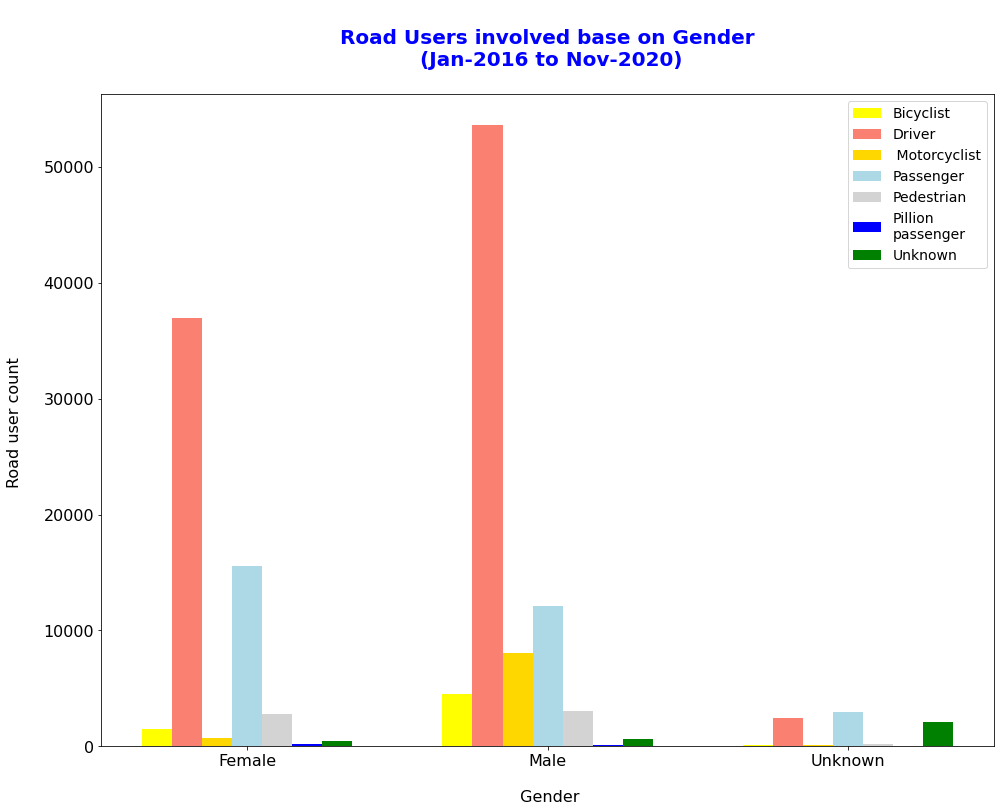

In [257]:
bar_width = 0.1 
xlabels = ['Female', 'Male', 'Unknown']

# Define bar group location on x_axis
bar1 = np.arange(len(xlabels))
bar2 = [i+bar_width for i in bar1]
bar3 = [i+bar_width for i in bar2]
bar4 = [i+bar_width for i in bar3]
bar5 = [i+bar_width for i in bar4]
bar6 = [i+bar_width for i in bar5]
bar7 = [i+bar_width for i in bar6]

plt.rcParams["figure.figsize"] = (16,12)
plt.plot(kind="bar")

plt.bar(bar1, bicyclists,bar_width, label='Bicyclist', color = 'yellow')
plt.bar(bar2, drivers,bar_width, label='Driver',  color = 'salmon')
plt.bar(bar3, motorcyclists, bar_width, label=' Motorcyclist', color ='gold')
plt.bar(bar4, passengers,bar_width, label='Passenger', color ='lightblue')
plt.bar(bar5, pedestrians,bar_width, label='Pedestrian',  color = 'lightgrey')
plt.bar(bar6, pill_assengers, bar_width, label='Pillion\npassenger', color ='blue')
plt.bar(bar7, unknowns,bar_width, label='Unknown', color ='green')

plt.title("\nRoad Users involved base on Gender\n (Jan-2016 to Nov-2020)\n", fontsize=20, color='b', fontweight='bold')
plt.xlabel("\n Gender", fontsize = 16)
plt.ylabel("Road user count \n",fontsize = 16)

# Define each label location where it starts from the first bar plus three bar widths
plt.xticks(bar1 + 3* bar_width, xlabels, fontsize = 16)
plt.yticks(fontsize = 16)

# Show plot
plt.legend(fontsize=14)
file_name = "RoadUserGenderBarChart"  
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)  

## Road User Type analysis involed in accidents

In [250]:
# Find count of the road user types
df = extract_person_df.groupby(["ROAD_USER_TYPE_DESC"]).count()["ACCIDENT_NO"]
df = df.to_frame()
df.reset_index(inplace = True)
df.to_excel("project_data/Cause_RdUsrType.xlsx", index=False)

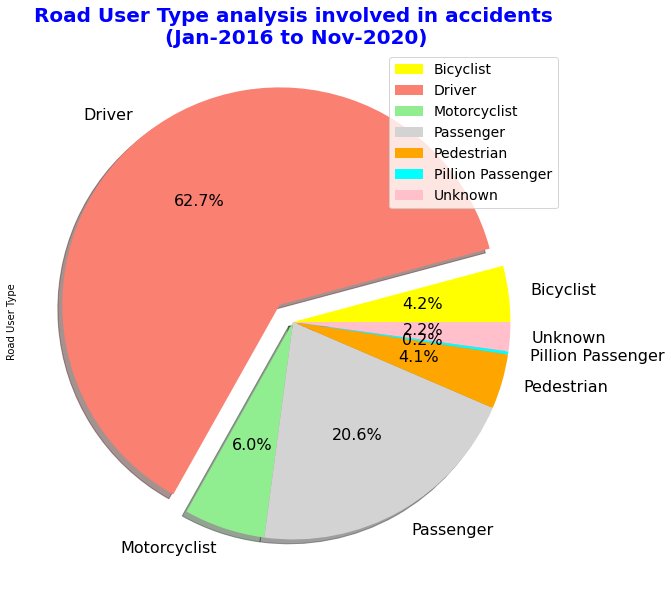

In [251]:
# Plot a pie chart of types involved
df.rename(columns = {'ACCIDENT_NO':"Road User Type"}, inplace = True)
user_counts = df["Road User Type"]
labels = ['Bicyclist', 'Driver', 'Motorcyclist', 'Passenger', 'Pedestrian', 'Pillion Passenger', 'Unknown']
colors = [ "yellow", "salmon", 'lightgreen', 'lightgrey','orange', 'cyan', 'pink']
explodes = (0, 0.1, 0, 0, 0, 0, 0)

acct_chart = pd.DataFrame(data = user_counts)     

acct_chart.plot(kind = "pie", figsize = [15,10],
       subplots=True, shadow = True, 
       labels = labels, fontsize = 16, explode = explodes,
       startangle = 0, colors = colors,autopct="%1.1f%%" );
 
# Set title
plt.title("Road User Type analysis involved in accidents\n (Jan-2016 to Nov-2020)", fontsize=20, color='b', fontweight='bold')

# Show plot
plt.legend(labels, loc="best", fontsize=14)
file_name = "RoadUserTypePieChart"  
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)              

## Road user injury level in accidents

### Find injury levels in the accident
#### - Pillion passenger and unknown user types are very low fatality, the fatality bars for these users are almost invisible in the bar chart.

#### Retrieve data and build data list

In [253]:
# Find injure level for Fatal, Serious Injury, Other injury and Not injured
df = extract_person_df.groupby(["ROAD_USER_TYPE_DESC", "INJ_LEVEL_DESC"]).count()["ACCIDENT_NO"]
df = df.to_frame()
df.reset_index(inplace = True)

# Build data lists
fatal_counts = df.loc[df["INJ_LEVEL_DESC"].isin(['Fatality'])]
fatal_counts = fatal_counts["ACCIDENT_NO"]
serious_inj_counts = df.loc[df["INJ_LEVEL_DESC"].isin(['Serious injury'])]  
serious_inj_counts = serious_inj_counts["ACCIDENT_NO"]
not_inj_counts = df.loc[df["INJ_LEVEL_DESC"].isin(['Not injured'])]  
not_inj_counts = not_inj_counts["ACCIDENT_NO"]
other_inj_counts = df.loc[df["INJ_LEVEL_DESC"].isin(['Other injury'])]  
other_inj_counts = other_inj_counts["ACCIDENT_NO"]
df.to_excel("project_data/Cause_RdUsrInjury.xlsx", index=False)

#### Setup bar, labels, etc for chart plotting

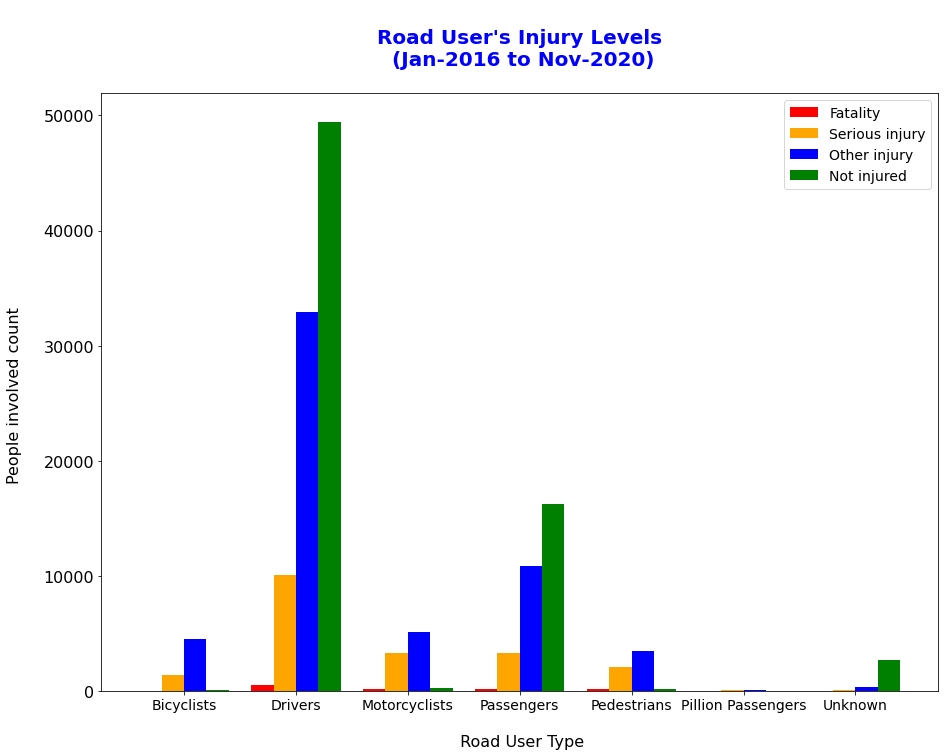

In [254]:
bar_width = 0.2 
xlabels = ['Bicyclists', 'Drivers', 'Motorcyclists', 'Passengers', 'Pedestrians', 'Pillion Passengers', 'Unknown']

# Define bar group distance on x_axis
bar1 = np.arange(len(xlabels))
bar2 = [i+bar_width for i in bar1]
bar3 = [i+bar_width for i in bar2]
bar4 = [i+bar_width for i in bar3]

plt.rcParams["figure.figsize"] = (15,11)
plt.plot(kind="bar")
plt.bar(bar1, fatal_counts,bar_width, label='Fatality', color = 'red')
plt.bar(bar2, serious_inj_counts,bar_width, label='Serious injury',  color = 'orange')
plt.bar(bar3, other_inj_counts, bar_width, label='Other injury', color ='blue')
plt.bar(bar4, not_inj_counts,bar_width, label='Not injured', color ='green')

plt.title("\nRoad User's Injury Levels\n (Jan-2016 to Nov-2020)\n", fontsize=20, color='b', fontweight='bold')
plt.xlabel("\n Road User Type", fontsize = 16)
plt.ylabel("People involved count \n",fontsize = 16)

# Define each label location where it starts from the first bar plus one and a half of the bar width
plt.xticks(bar1 + bar_width + bar_width/2, xlabels, fontsize = 14)
plt.yticks(fontsize = 16)

# Show plot
plt.legend(fontsize = 14)
file_name = "RoadUserInjuryLevelBarChart"  
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)              

### Close log file and redirect to stdout to console

In [81]:
# replacing the original output format to stdout.
print(f"*** Log file created: {filepath} ************************************")
sys.stdout = orig_stdout

# Closing the log file.
log_file.close()

In [82]:
sys.stdout.flush() 
print(f"*** Log file created: {filepath} *******")

*** Log file created: c:/Project_output/RoadUserInjuryLevelBarChart *******
